# Shopify Data Science Intern Challenge


## Abduallah Ali
 13.06.2022

#### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

### Question
#### Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
#### What metric would you report for this dataset?
#### What is its value?


In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [193]:
df=pd.read_csv('Data/Data-Science-Intern-Challenge-Data.csv')

### Data exploration

In [194]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [196]:
duplicateRows = df[df.duplicated()]
duplicateRows

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


In [197]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


###### The mean order amount is too high for a shop that sell a sneaker that indicates that some data or somer stores might be associated with outliers to find these outliers a more exploration should be done


In [198]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [199]:
print(f"Number of sneakers shops :{df['shop_id'].nunique()}")

Number of sneakers shops :100


In [200]:
print(f"Average order value (AOV) of thee sneaker shops is : {df['order_amount'].sum()/len(df)}")

Average order value (AOV) of thee sneaker shops is : 3145.128


###### From the figure table, we realize that there are a lot of outliers, which are greatly affecting the AOV by skewing the mean upwards. This could be perhaps due to these merchants using a different currency or wrong entered data

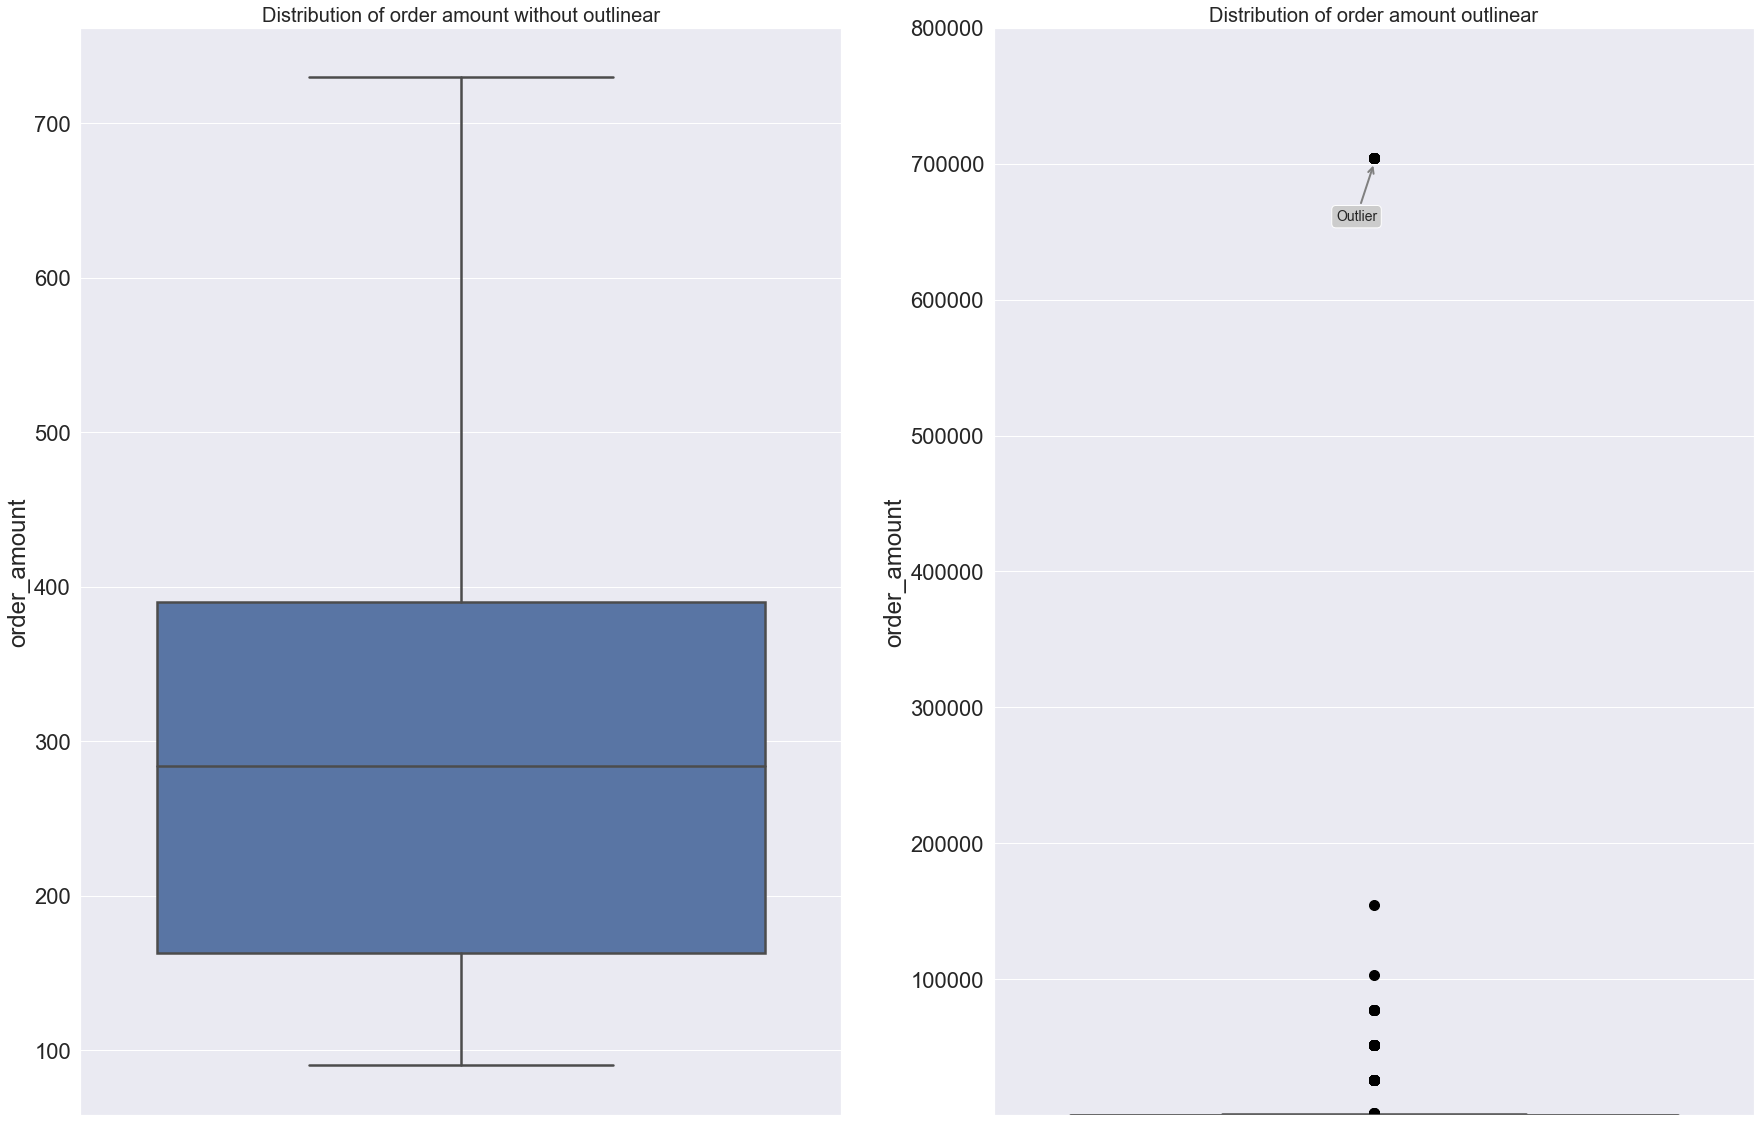

In [228]:
fig,axes=plt.subplots(1,2)

sns.set_theme(style="whitegrid")

axes[1].annotate('Outlier', xy=(0,700000), xytext=(-0.05,658000), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

flierprops = dict(marker='o', markerfacecolor='black', markersize=10,  markeredgecolor='black')


axes[0].set_title('Distribution of order amount without outlinear',fontsize=20)

axes[1].set_title('Distribution of order amount outlinear',fontsize=20)
axes[1].set_ylim(400, 800000)


sns.set(font_scale = 1)


f1=sns.boxplot(y='order_amount',data=df,hue='shop_id', linewidth=2.5,showfliers = False , ax=axes[0])
f2=sns.boxplot(y='order_amount',data=df,hue='shop_id', linewidth=2.5,showfliers = True ,flierprops=flierprops, ax=axes[1])


plt.show()

###### More Investigation on why the average order value is so high, if we calculate an average order value per shop. 

In [219]:
 df_group_AOV_pershop= pd.DataFrame({'Average order per shop':df.groupby('shop_id')['order_amount'].mean()}).sort_values(by='shop_id',ascending=True)

In [222]:
df_group_AOV_pershop

,Average order per shop
shop_id,
1,308.818182
2,174.327273
3,305.250000
4,258.509804
5,290.311111
...,...
96,330.000000
97,324.000000
98,245.362069


###### As the barplot graph below shows shop with id 42 and 78 seem to be the culprit of the outliers

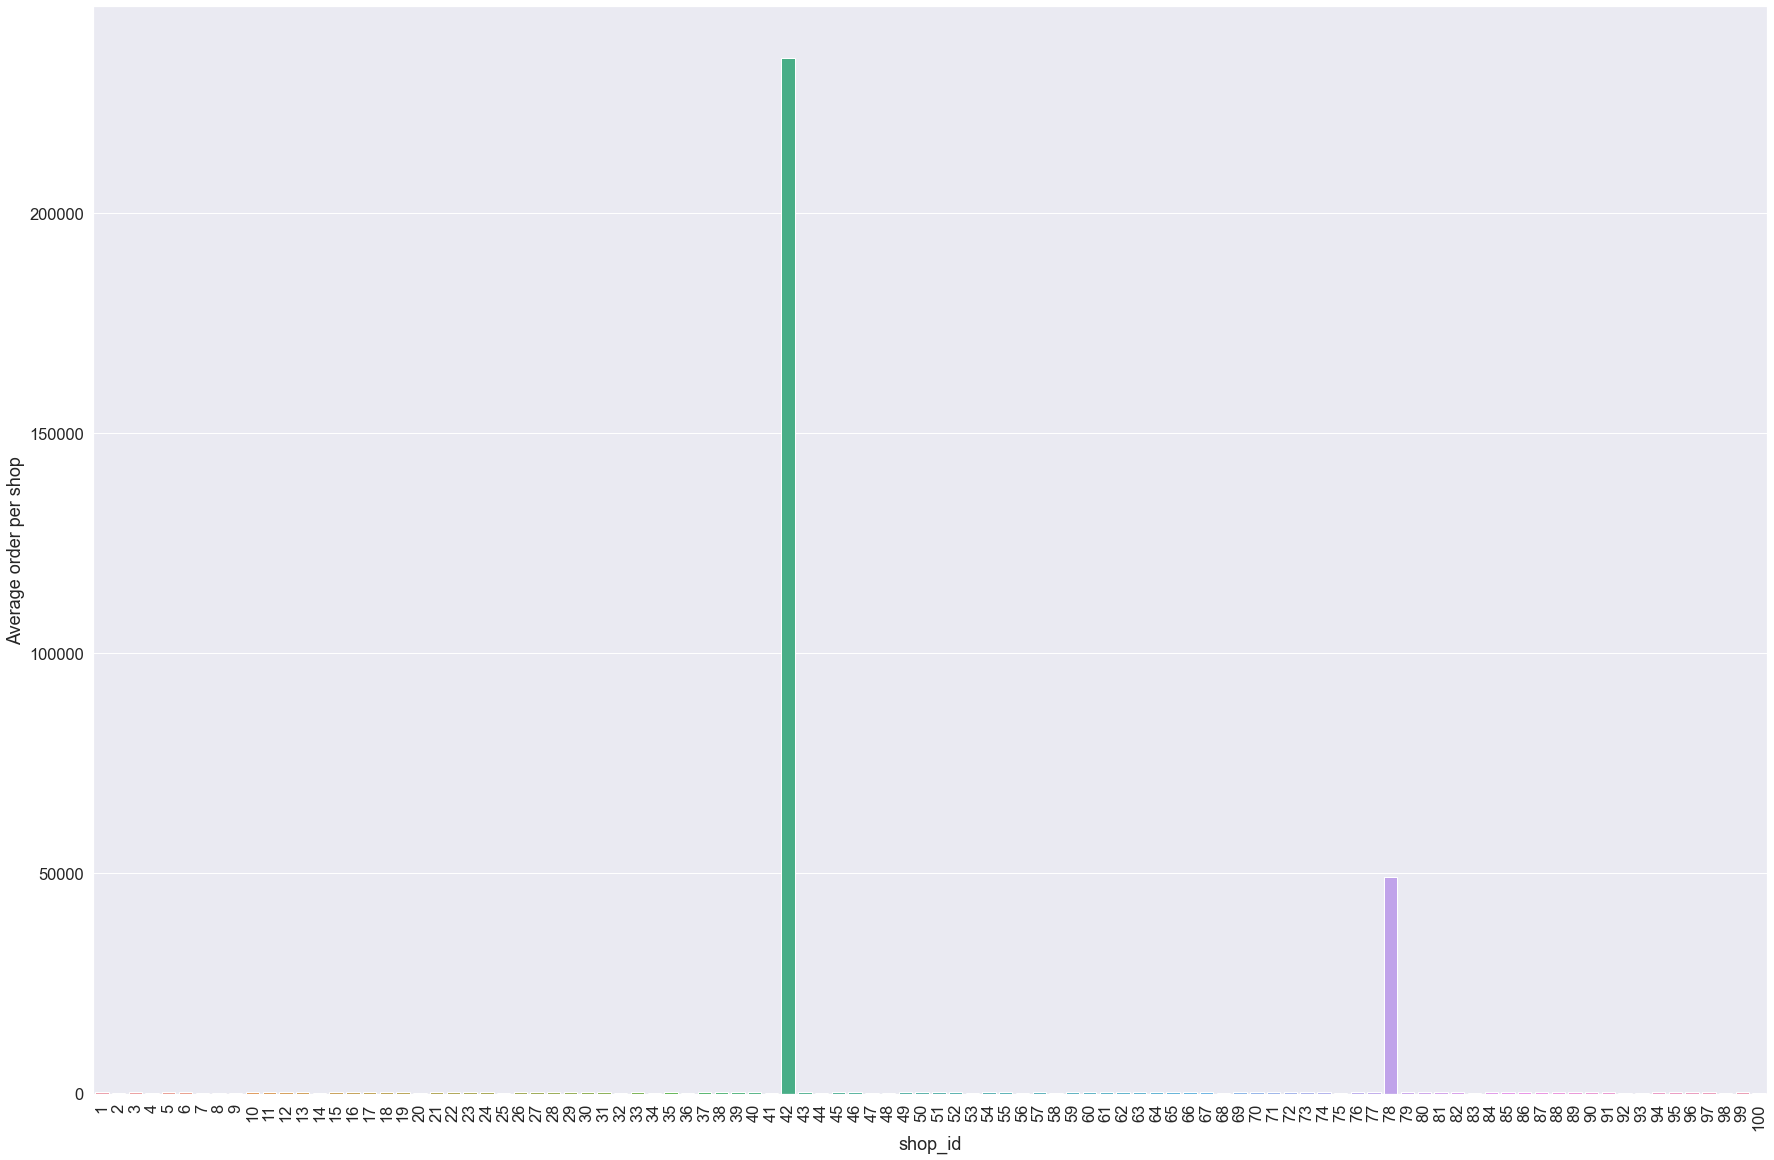

In [239]:
axx=sns.barplot(x='shop_id', y='Average order per shop', data=df_group_AOV_pershop2)
axx.set_xticklabels(axx.get_xticklabels(),rotation = 90)
sns.set(font_scale = 1.5)


plt.show()

##### Explore if the whole shop_id 78 and 42 cause the outliers or some specefic order

In [282]:
df.query('shop_id == 78').sort_values(by='order_amount',ascending=False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05


In [281]:
df.query('shop_id == 42').sort_values(by='order_amount',ascending=False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00


In [264]:
df_shop_id_42 = df.query('shop_id == 42').groupby('user_id')['order_amount'].sum()
df_shop_id_42.head()

user_id
607    11968000
720         704
726        1056
736         704
739        1056
Name: order_amount, dtype: int64

##### As a conclution the whole shop_id 78 has a high order_amount. while, the shop_id 42 not all of it but only the user_id 607 has a huge demand compare with the others user_id in the same shop. Removing and cleaning the data and see how it impact teh mean

In [272]:
df_after_removing_outlinear = df[df['user_id']!=607]
df_after_removing_outlinear = df_after_removing_outlinear[df_after_removing_outlinear['shop_id']!=78]
df_after_removing_outlinear.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


##### Conclusion There are different strategies that could be used in the handling of outliers. One solution could be to filter the data, remove the outliers (There are 2 outliers: user id 607 and shop id 78 : These 2 are the main reasons of fraud) and continue using the average of the order_amount.  The other would be to use the median of the distribution, because this measure is not very sensitive to outliers in the data.

In [273]:
df_after_removing_outlinear.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


In [284]:
df_after_removing_outlinear.order_amount.mean()

302.58051448247926

In [286]:
df_after_removing_outlinear.order_amount.median()

284.0

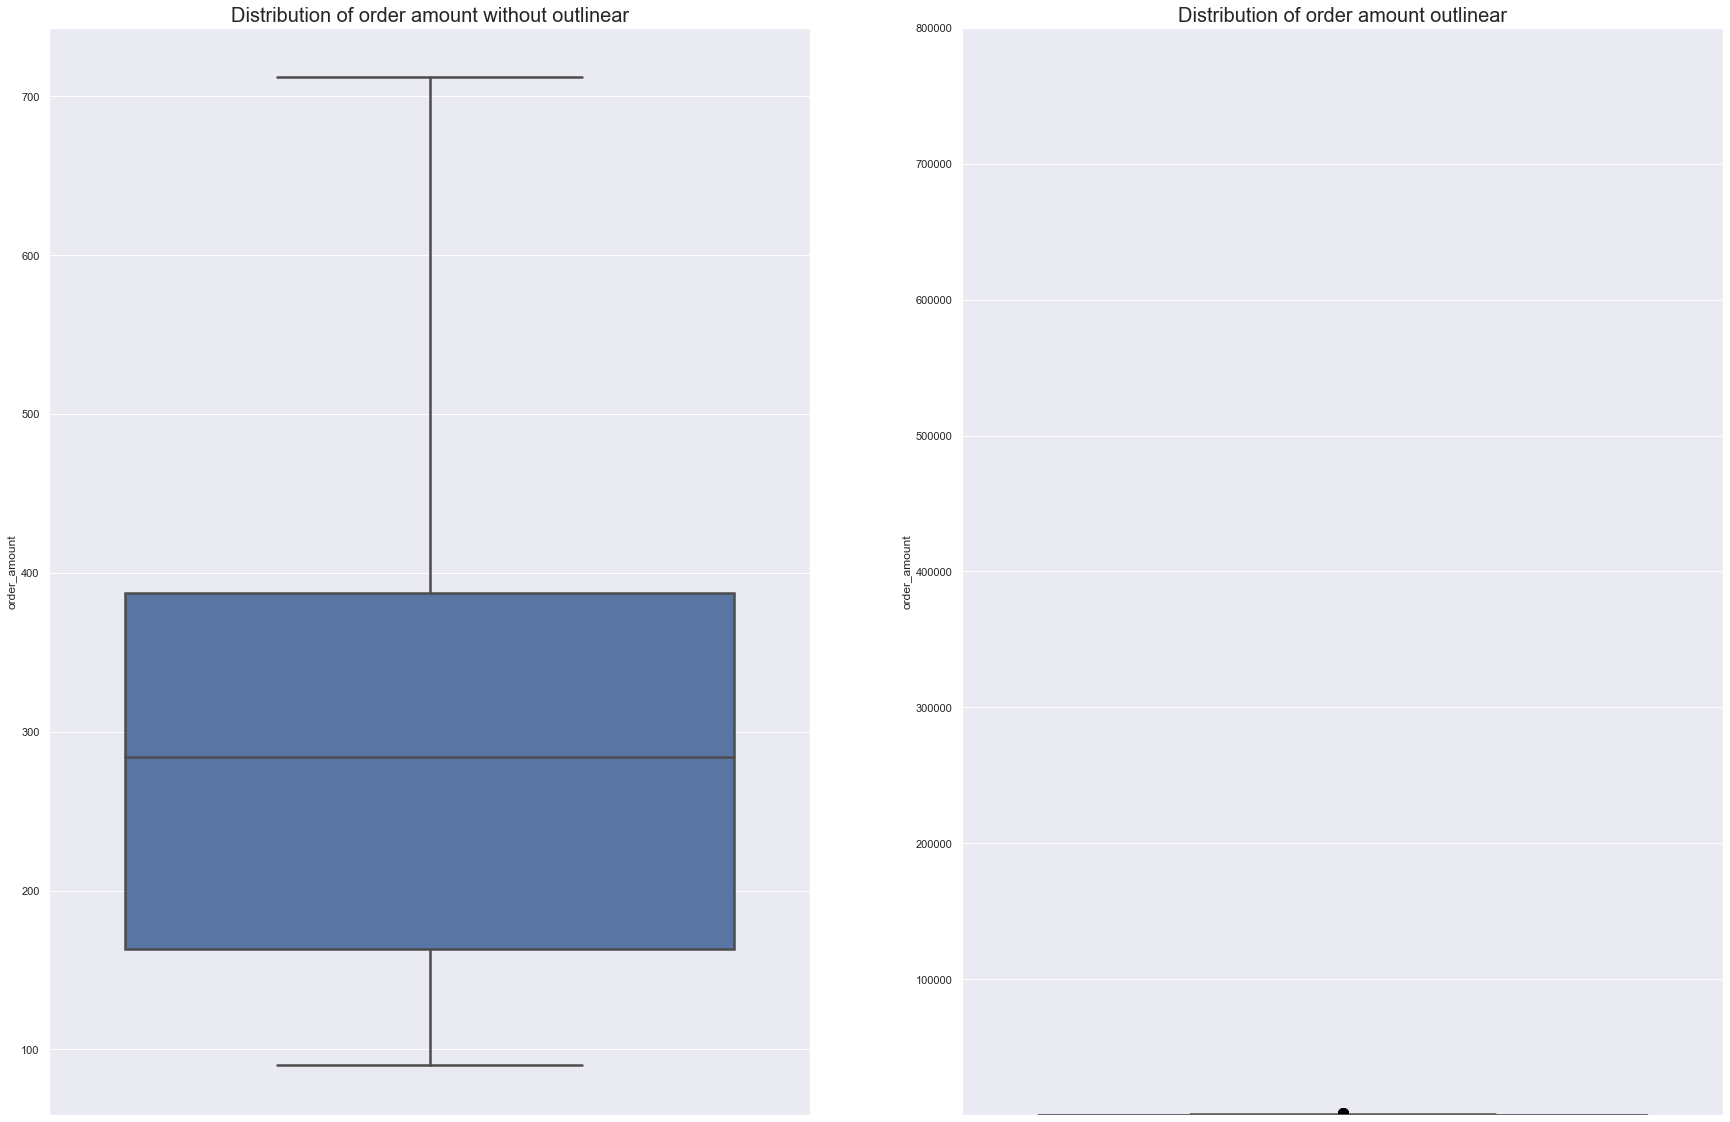

In [275]:
fig,axes=plt.subplots(1,2)

sns.set_theme(style="whitegrid")


# set figure size
sns.set(rc={"figure.figsize": (30, 20)})
flierprops = dict(marker='o', markerfacecolor='black', markersize=10,  markeredgecolor='black')


axes[0].set_title('Distribution of order amount without outlinear',fontsize=20)

axes[1].set_title('Distribution of order amount outlinear',fontsize=20)
axes[1].set_ylim(400, 800000)


sns.set(font_scale = 1)


f1=sns.boxplot(y='order_amount',data=df_after_removing_outlinear, linewidth=2.5,showfliers = False , ax=axes[0])
f2=sns.boxplot(y='order_amount',data=df_after_removing_outlinear, linewidth=2.5,showfliers = True ,flierprops=flierprops, ax=axes[1])


plt.show()

# Question 2

###### For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below. 

### A. How many orders were shipped by Speedy Express in total?
54 orders were shipped by Speedy Express.

In [291]:
''' SELECT COUNT(*) FROM Orders
JOIN Shippers ON Shippers.ShipperID = Orders.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express'; '''

" SELECT Count(OrderID) FROM  Orders o Inner Join Shippers s \nON o.ShipperID = s.ShipperID \nWhere ShipperName = 'Speedy Express' "

### B. What is the last name of the employee with the most orders?

Peacock with 40 orders.

In [ ]:
''' SELECT Employees.LastName, Count() AS num_orders FROM Orders
JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName ORDER BY num_orders DESC; '''

### C. What product was ordered the most by customers in Germany?

Boston Crab Meat was ordered the most in Germany with a total order quantity of 160.

In [ ]:
''' SELECT Products.ProductName, Sum(OrderDetails.Quantity) as most_ordered FROM Orders
JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
JOIN Customers ON Orders.CustomerID = Customers.CustomerID
JOIN Products ON OrderDetails.ProductID = Products.ProductID
WHERE Country = 'Germany'
GROUP BY Products.ProductName ORDER BY most_ordered DESC; '''